In [57]:
import pandas as pd
import re
import numpy as np

In [58]:
EM=pd.read_csv("Elon_Musk.csv", encoding="latin1")
EM

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the negative propaganda is still all out there &amp; easy to find in social me https://t.co/WJRzIbKh1H"
1995,1996,@PPathole Make sure to read ur terms &amp; conditions before clicking accept!
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525><U+0001F525>


In [59]:
EM.head()

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!


# EDA

In [60]:
EM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1999 non-null   int64 
 1   Text        1999 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


In [61]:
EM.duplicated().sum()

0

In [62]:
EM2=EM.drop(columns=('Unnamed: 0'),axis=1)
EM2

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!
...,...
1994,"@flcnhvy True, it sounds so surreal, but the negative propaganda is still all out there &amp; easy to find in social me https://t.co/WJRzIbKh1H"
1995,@PPathole Make sure to read ur terms &amp; conditions before clicking accept!
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525><U+0001F525>


# PreProcessing

# Step 1 : Removing spaces and symbol

In [63]:
EM.Text=EM.Text.apply(lambda x: re.sub('[^a-zA-Z ]', "", x))
EM

,Unnamed: 0,Text
0,1,kunalb Im an alien
1,2,IDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel Have you tried it
2,3,joerogan Spotify Great interview
3,4,gtera Doge is underestimated
4,5,teslacn Congratulations Tesla China for amazing execution last year Now on to the next for even more
...,...,...
1994,1995,flcnhvy True it sounds so surreal but the negative propaganda is still all out there amp easy to find in social me httpstcoWJRzIbKhH
1995,1996,PPathole Make sure to read ur terms amp conditions before clicking accept
1996,1997,TeslaGong PPathole Samwise Gamgee
1997,1998,PPathole Altho Dumb and Dumber is UFUF


# Step - 2 : Make text to lower

In [64]:
EM.Text=EM.Text.apply(lambda x: x.lower())
EM

,Unnamed: 0,Text
0,1,kunalb im an alien
1,2,idaacarmack ray tracing on cyberpunk with hdr is nextlevel have you tried it
2,3,joerogan spotify great interview
3,4,gtera doge is underestimated
4,5,teslacn congratulations tesla china for amazing execution last year now on to the next for even more
...,...,...
1994,1995,flcnhvy true it sounds so surreal but the negative propaganda is still all out there amp easy to find in social me httpstcowjrzibkhh
1995,1996,ppathole make sure to read ur terms amp conditions before clicking accept
1996,1997,teslagong ppathole samwise gamgee
1997,1998,ppathole altho dumb and dumber is ufuf


# Step 3:- Splitting the words from line

In [65]:
EM.Text=EM.Text.apply(lambda x: x.split())
EM

,Unnamed: 0,Text
0,1,"[kunalb, im, an, alien]"
1,2,"[idaacarmack, ray, tracing, on, cyberpunk, with, hdr, is, nextlevel, have, you, tried, it]"
2,3,"[joerogan, spotify, great, interview]"
3,4,"[gtera, doge, is, underestimated]"
4,5,"[teslacn, congratulations, tesla, china, for, amazing, execution, last, year, now, on, to, the, next, for, even, more]"
...,...,...
1994,1995,"[flcnhvy, true, it, sounds, so, surreal, but, the, negative, propaganda, is, still, all, out, there, amp, easy, to, find, in, social, me, httpstcowjrzibkhh]"
1995,1996,"[ppathole, make, sure, to, read, ur, terms, amp, conditions, before, clicking, accept]"
1996,1997,"[teslagong, ppathole, samwise, gamgee]"
1997,1998,"[ppathole, altho, dumb, and, dumber, is, ufuf]"


# Step 4 :- Removing Stopwords

In [66]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91767\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [67]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91767\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [68]:
EM.Text=EM.Text.apply(lambda x: [word  for word in x if word not in set(stopwords.words('english'))])
EM

,Unnamed: 0,Text
0,1,"[kunalb, im, alien]"
1,2,"[idaacarmack, ray, tracing, cyberpunk, hdr, nextlevel, tried]"
2,3,"[joerogan, spotify, great, interview]"
3,4,"[gtera, doge, underestimated]"
4,5,"[teslacn, congratulations, tesla, china, amazing, execution, last, year, next, even]"
...,...,...
1994,1995,"[flcnhvy, true, sounds, surreal, negative, propaganda, still, amp, easy, find, social, httpstcowjrzibkhh]"
1995,1996,"[ppathole, make, sure, read, ur, terms, amp, conditions, clicking, accept]"
1996,1997,"[teslagong, ppathole, samwise, gamgee]"
1997,1998,"[ppathole, altho, dumb, dumber, ufuf]"


In [69]:
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

# Step 5:- Stemming

In [70]:
ps=PorterStemmer()
EM.Text=EM.Text.apply(lambda x: [ps.stem(word) for word in x])

In [71]:
EM

,Unnamed: 0,Text
0,1,"[kunalb, im, alien]"
1,2,"[idaacarmack, ray, trace, cyberpunk, hdr, nextlevel, tri]"
2,3,"[joerogan, spotifi, great, interview]"
3,4,"[gtera, doge, underestim]"
4,5,"[teslacn, congratul, tesla, china, amaz, execut, last, year, next, even]"
...,...,...
1994,1995,"[flcnhvi, true, sound, surreal, neg, propaganda, still, amp, easi, find, social, httpstcowjrzibkhh]"
1995,1996,"[ppathol, make, sure, read, ur, term, amp, condit, click, accept]"
1996,1997,"[teslagong, ppathol, samwis, gamge]"
1997,1998,"[ppathol, altho, dumb, dumber, ufuf]"


# Step 6 :- Rejoining

In [72]:
EM.Text=EM.Text.apply(lambda x: " ".join(x))

In [73]:
EM

,Unnamed: 0,Text
0,1,kunalb im alien
1,2,idaacarmack ray trace cyberpunk hdr nextlevel tri
2,3,joerogan spotifi great interview
3,4,gtera doge underestim
4,5,teslacn congratul tesla china amaz execut last year next even
...,...,...
1994,1995,flcnhvi true sound surreal neg propaganda still amp easi find social httpstcowjrzibkhh
1995,1996,ppathol make sure read ur term amp condit click accept
1996,1997,teslagong ppathol samwis gamge
1997,1998,ppathol altho dumb dumber ufuf


# Sentimental Analysis

In [74]:
pip install -U textblob

Note: you may need to restart the kernel to use updated packages.


In [75]:
from textblob import TextBlob

In [76]:
EM['sentiment']=EM['Text'].apply(lambda x: TextBlob(x).sentiment[0])
EM[['Text','sentiment']].head()

,Text,sentiment
0,kunalb im alien,-0.25
1,idaacarmack ray trace cyberpunk hdr nextlevel tri,0.00
2,joerogan spotifi great interview,0.80
3,gtera doge underestim,0.00
4,teslacn congratul tesla china amaz execut last year next even,0.00


# Problem Statement - 2

1) Extract reviews of any product from ecommerce website like amazon

2) Perform emotion mining

# Scraping reviews using BeautifulSoup

In [77]:
link='https://www.amazon.in/www.amazon.in-%E2%80%BA-Echo-show-5-Smart-speaker-with-5.5-screen-and-Alexa/product-reviews/B08KGVYX6F/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews'

In [78]:
import requests
from bs4 import BeautifulSoup
import seaborn as sns
import matplotlib.pyplot as plt

In [79]:
## Getting reviews of first five pages
review_list=[]

for k in range(0,6):
    review_link=link+'&pageNumber='+str(k)
    print(review_link)
    page=requests.get(review_link)
    soup=BeautifulSoup(page.content,'html.parser')
    reviews=soup.find_all('span',class_='review-text-content')
    
    for i in range(0,len(reviews)):
        
        review_list.append(reviews[i].get_text().strip())

https://www.amazon.in/www.amazon.in-%E2%80%BA-Echo-show-5-Smart-speaker-with-5.5-screen-and-Alexa/product-reviews/B08KGVYX6F/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=0
https://www.amazon.in/www.amazon.in-%E2%80%BA-Echo-show-5-Smart-speaker-with-5.5-screen-and-Alexa/product-reviews/B08KGVYX6F/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=1
https://www.amazon.in/www.amazon.in-%E2%80%BA-Echo-show-5-Smart-speaker-with-5.5-screen-and-Alexa/product-reviews/B08KGVYX6F/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=2
https://www.amazon.in/www.amazon.in-%E2%80%BA-Echo-show-5-Smart-speaker-with-5.5-screen-and-Alexa/product-reviews/B08KGVYX6F/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=3
https://www.amazon.in/www.amazon.in-%E2%80%BA-Echo-show-5-Smart-speaker-with-5.5-screen-and-Alexa/product-reviews/B08KGVYX6F/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=4
https

In [80]:
review_list

['Microphones on Echo Show are NOT sensitive as Echo Dot. Even response has a bit dealy. Echo Dot is super sensitve and great response. I brought 5 Echo dots and 1 Echo Show. Well timed on Geat India sale 2022. Now my home is fully automated.',
 'Its ok just for entertainment',
 'Good stuff',
 "Doesn't connect to all devices as advertised",
 'It has been about 1.5 years since I m having this and from a few months back, she is having voice recognition problems. She does not listen to “ALEXA” not even at top of my voice. I changed the wake word as well but still facing the issue. Has contacted to the Amazon customer care number but they told me to wait for sometime and then just hung up. That’s not good Amazon',
 'its only been a couple of months since i have purchased this product...but recently i have been facing an issue ...its voice recognision is not workin properly....if its a software issue pls provide an update or kindly provide support',
 "It's a nice little echo device to place

In [81]:
len(review_list)

10

In [82]:
df=pd.DataFrame({'Reviews':review_list})
pd.set_option('max_colwidth', 800)
df

,Reviews
0,Microphones on Echo Show are NOT sensitive as Echo Dot. Even response has a bit dealy. Echo Dot is super sensitve and great response. I brought 5 Echo dots and 1 Echo Show. Well timed on Geat India sale 2022. Now my home is fully automated.
1,Its ok just for entertainment
2,Good stuff
3,Doesn't connect to all devices as advertised
4,"It has been about 1.5 years since I m having this and from a few months back, she is having voice recognition problems. She does not listen to “ALEXA” not even at top of my voice. I changed the wake word as well but still facing the issue. Has contacted to the Amazon customer care number but they told me to wait for sometime and then just hung up. That’s not good Amazon"
5,its only been a couple of months since i have purchased this product...but recently i have been facing an issue ...its voice recognision is not workin properly....if its a software issue pls provide an update or kindly provide support
6,"It's a nice little echo device to place on your work desk or bedside. Really sharp display and nice touch screen, although the processing itself is rather slow. When you select things on the screen it takes a moment to respond. It's not an echo that you want to listen music on (show 10 is much better for that), as the speaker is rather tinny. However, its great to control smart devices, set alarm/timers and ofcourse...use as a clock.My experience didn't start well though as i got a used piece. The box had been opened and then taped back, the product inside had been used as well since the touch screen was covered in greasy fingerprints. It worked fine and didn't have scratches so didn't bother to return."
7,"The media could not be loaded.\n \n\n\n\n Working only screen... No sound, kindly provide service center"
8,Too small screen. Smaller than a standard mobile phone. I returned this and bought a echo show 8 which is really good.
9,Not working now. I think have a software issue.Can you please send someone to check.It would be nice if you could help me to fix the issue.Thanks


# Text preprocessing

In [83]:
## Converting to lower case

df['cleaned_reviews']=[x.lower()for x in df.Reviews]
df.head()

,Reviews,cleaned_reviews
0,Microphones on Echo Show are NOT sensitive as Echo Dot. Even response has a bit dealy. Echo Dot is super sensitve and great response. I brought 5 Echo dots and 1 Echo Show. Well timed on Geat India sale 2022. Now my home is fully automated.,microphones on echo show are not sensitive as echo dot. even response has a bit dealy. echo dot is super sensitve and great response. i brought 5 echo dots and 1 echo show. well timed on geat india sale 2022. now my home is fully automated.
1,Its ok just for entertainment,its ok just for entertainment
2,Good stuff,good stuff
3,Doesn't connect to all devices as advertised,doesn't connect to all devices as advertised
4,"It has been about 1.5 years since I m having this and from a few months back, she is having voice recognition problems. She does not listen to “ALEXA” not even at top of my voice. I changed the wake word as well but still facing the issue. Has contacted to the Amazon customer care number but they told me to wait for sometime and then just hung up. That’s not good Amazon","it has been about 1.5 years since i m having this and from a few months back, she is having voice recognition problems. she does not listen to “alexa” not even at top of my voice. i changed the wake word as well but still facing the issue. has contacted to the amazon customer care number but they told me to wait for sometime and then just hung up. that’s not good amazon"


In [84]:
## Removing numbers and special characters
df['cleaned_reviews']=[re.sub('[^A-Za-z ]+', '',x)for x in df['cleaned_reviews']]
df.head()

,Reviews,cleaned_reviews
0,Microphones on Echo Show are NOT sensitive as Echo Dot. Even response has a bit dealy. Echo Dot is super sensitve and great response. I brought 5 Echo dots and 1 Echo Show. Well timed on Geat India sale 2022. Now my home is fully automated.,microphones on echo show are not sensitive as echo dot even response has a bit dealy echo dot is super sensitve and great response i brought echo dots and echo show well timed on geat india sale now my home is fully automated
1,Its ok just for entertainment,its ok just for entertainment
2,Good stuff,good stuff
3,Doesn't connect to all devices as advertised,doesnt connect to all devices as advertised
4,"It has been about 1.5 years since I m having this and from a few months back, she is having voice recognition problems. She does not listen to “ALEXA” not even at top of my voice. I changed the wake word as well but still facing the issue. Has contacted to the Amazon customer care number but they told me to wait for sometime and then just hung up. That’s not good Amazon",it has been about years since i m having this and from a few months back she is having voice recognition problems she does not listen to alexa not even at top of my voice i changed the wake word as well but still facing the issue has contacted to the amazon customer care number but they told me to wait for sometime and then just hung up thats not good amazon


In [85]:
## Removing stopwords

df['cleaned_reviews'] = df['cleaned_reviews'].apply(lambda x: ' '.join([item for item in x.split() if item not in stopwords.words('english')]))


# Generating WordCloud

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

In [87]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


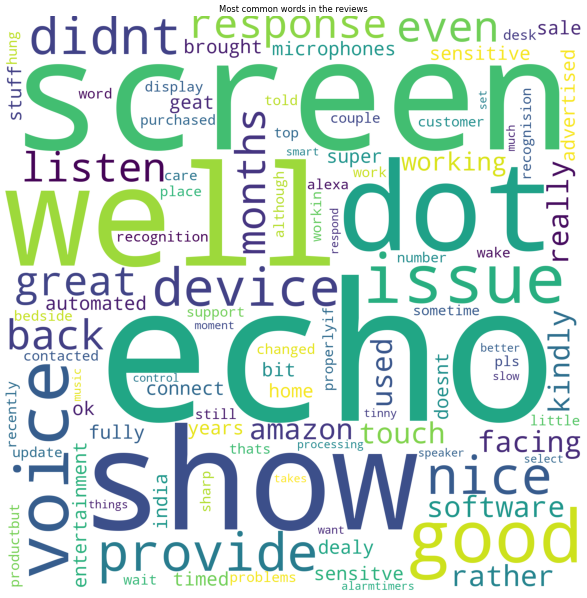

In [88]:
from wordcloud import WordCloud
wordcloud = WordCloud(height=2000, width=2000,max_words=100, background_color='white')
wordcloud = wordcloud.generate(' '.join(df['cleaned_reviews'].tolist()))
plt.figure(figsize=(15,15),dpi=50)
plt.imshow(wordcloud)
plt.title("Most common words in the reviews")
plt.axis('off')
plt.show()

# Sentiment Analysis Using Vader

In [93]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\91767\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [94]:
from nltk.sentiment import SentimentIntensityAnalyzer
si = SentimentIntensityAnalyzer()

In [95]:
#Extracting compound score
def sentiment_score(text):
    score=si.polarity_scores(text)
    return score['compound']

In [96]:
df['sentiment_score'] = df['cleaned_reviews'].apply(lambda x: sentiment_score(x))


In [97]:
pd.set_option('max_colwidth', 500)
df.head()

,Reviews,cleaned_reviews,sentiment_score
0,Microphones on Echo Show are NOT sensitive as Echo Dot. Even response has a bit dealy. Echo Dot is super sensitve and great response. I brought 5 Echo dots and 1 Echo Show. Well timed on Geat India sale 2022. Now my home is fully automated.,microphones echo show sensitive echo dot even response bit dealy echo dot super sensitve great response brought echo dots echo show well timed geat india sale home fully automated,0.8779
1,Its ok just for entertainment,ok entertainment,0.6124
2,Good stuff,good stuff,0.4404
3,Doesn't connect to all devices as advertised,doesnt connect devices advertised,0.0000
4,"It has been about 1.5 years since I m having this and from a few months back, she is having voice recognition problems. She does not listen to “ALEXA” not even at top of my voice. I changed the wake word as well but still facing the issue. Has contacted to the Amazon customer care number but they told me to wait for sometime and then just hung up. That’s not good Amazon",years since months back voice recognition problems listen alexa even top voice changed wake word well still facing issue contacted amazon customer care number told wait sometime hung thats good amazon,0.8402


In [98]:
## Defining function to assign sentiment category based on sentiment scores
## Score Range -0.5 to 0.5 is considered as neutral
def sentiment_category(score1):
    if(score1 > 0.5):
        return 'Positive'
    elif(score1 < -0.5):
        return 'Negative'
    else:
        return 'Neutral'

In [99]:
df['sentiment'] = df['sentiment_score'].apply(lambda x:sentiment_category(x))


In [100]:
df.head()

,Reviews,cleaned_reviews,sentiment_score,sentiment
0,Microphones on Echo Show are NOT sensitive as Echo Dot. Even response has a bit dealy. Echo Dot is super sensitve and great response. I brought 5 Echo dots and 1 Echo Show. Well timed on Geat India sale 2022. Now my home is fully automated.,microphones echo show sensitive echo dot even response bit dealy echo dot super sensitve great response brought echo dots echo show well timed geat india sale home fully automated,0.8779,Positive
1,Its ok just for entertainment,ok entertainment,0.6124,Positive
2,Good stuff,good stuff,0.4404,Neutral
3,Doesn't connect to all devices as advertised,doesnt connect devices advertised,0.0000,Neutral
4,"It has been about 1.5 years since I m having this and from a few months back, she is having voice recognition problems. She does not listen to “ALEXA” not even at top of my voice. I changed the wake word as well but still facing the issue. Has contacted to the Amazon customer care number but they told me to wait for sometime and then just hung up. That’s not good Amazon",years since months back voice recognition problems listen alexa even top voice changed wake word well still facing issue contacted amazon customer care number told wait sometime hung thats good amazon,0.8402,Positive


In [101]:
## calculating the categories of sentiments and their counts
df['sentiment'].value_counts()

Positive    6
Neutral     4
Name: sentiment, dtype: int64

<AxesSubplot:xlabel='sentiment', ylabel='count'>

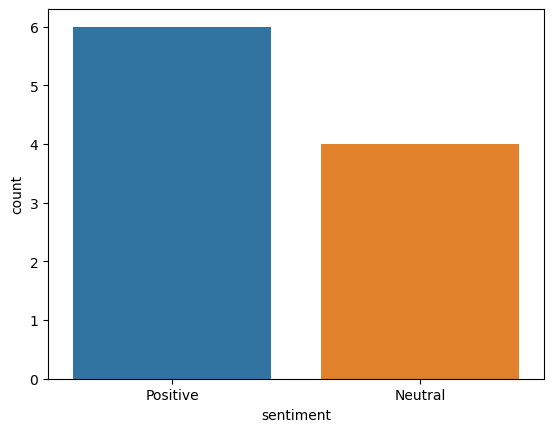

In [102]:
sns.countplot(x=df['sentiment'])